OR 게이트 구현해보기 0, 0 -> 0  ...0, 1 -> 1  ...1, 0 -> 1  ...1, 1 -> 1

데이터 준비하기

In [2]:
import numpy
import tensorflow as tf

tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

In [14]:
# 데이터 준비하기
data = numpy.array([[0, 0], [1, 0], [0, 1], [1, 1]])  # OR 연산 학습 데이터
# label = numpy.array([[0], [1], [1], [1]])             # 정답
label = numpy.array([[0], [1], [1], [0]])             # XOR 연산 학습 데이터

모델 구성하기

In [15]:
model = Sequential()
model.add(Dense(1, input_shape = (2,), activation = 'linear'))  # 단층 퍼셉트론을 구성

모델 설정하기

In [16]:
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])

In [17]:
# 모델 확인하기
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


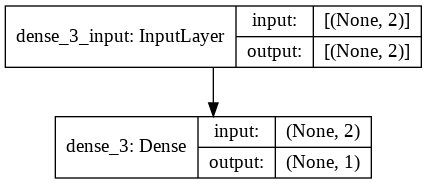

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

모델 학습시키기

In [19]:
history = model.fit(data, label, epochs = 888) # 학습 데이터, 정답, 공부 횟수

Epoch 1/888
1/1 [==============================] - 0s 248ms/step - loss: 2.8644 - acc: 0.5000
Epoch 2/888
1/1 [==============================] - 0s 5ms/step - loss: 2.7051 - acc: 0.5000
Epoch 3/888
1/1 [==============================] - 0s 5ms/step - loss: 2.5558 - acc: 0.5000
Epoch 4/888
1/1 [==============================] - 0s 4ms/step - loss: 2.4159 - acc: 0.5000
Epoch 5/888
1/1 [==============================] - 0s 6ms/step - loss: 2.2847 - acc: 0.5000
Epoch 6/888
1/1 [==============================] - 0s 4ms/step - loss: 2.1616 - acc: 0.5000
Epoch 7/888
1/1 [==============================] - 0s 4ms/step - loss: 2.0463 - acc: 0.5000
Epoch 8/888
1/1 [==============================] - 0s 4ms/step - loss: 1.9382 - acc: 0.5000
Epoch 9/888
1/1 [==============================] - 0s 5ms/step - loss: 1.8368 - acc: 0.5000
Epoch 10/888
1/1 [==============================] - 0s 5ms/step - loss: 1.7418 - acc: 0.5000
Epoch 11/888
1/1 [==============================] - 0s 5ms/step - loss: 1.652

학습결과 그려보기

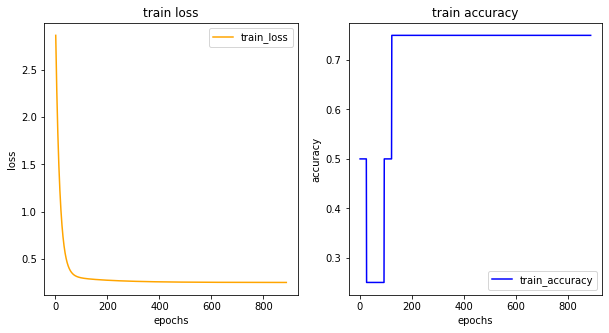

In [20]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

모델 가중치 확인

In [10]:
model.get_weights()

[array([[0.48927426],
        [0.47228694]], dtype=float32), array([0.27279684], dtype=float32)]

모델 예측하기

In [11]:
result = model.predict(data)  # 0과 1로 보고싶다면 model.predict_classes(data)
print(result)

[[0.27279684]
 [0.76207113]
 [0.7450838 ]
 [1.2343581 ]]
